# Problem Statement

*For this project, you must create a data set by simulationing a real world phenomenom of your choosing. You may pick any phenomenom you wish - you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenum, you should model and synthesize such data using Python. We suggest you use the numpy.random package for this purpose.*

## References

- https://en.wikipedia.org/wiki/Red_Hat
- https://searchsoftwarequality.techtarget.com/definition/histogram
- https://en.wikipedia.org/wiki/Simpson%27s_paradox
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://en.wikipedia.org/wiki/Sepal
- https://en.wikipedia.org/wiki/Petal
- https://www.scipy.org/


## 1. Choose a real-world phenomenom that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

![Consulting](https://raw.githubusercontent.com/fionanealon/KPI/master/img/consulting2.jpeg)

### Real-world pheomenon

Red Hat, Inc. is an American multinational software company providing open-source software products to the enterprise community. Red Hat provides storage, operating system platforms, middleware, applications, management products, and support, training, and consulting services.[Ref: Red Hat](https://en.wikipedia.org/wiki/Red_Hat)

I have based my research on a recent engagement delivered by the consulting services divison of Red Hat. This engagement was delivered by three resource types - consultant, architect and program manager.

The consulting services division have consistently been finding anomolies in one of their key performances indicators - the sales to expenses ratio. The sales to expenses ratio is used to monitor expenses incurred by resources. It also shows the efficiency of a company's management by comparing sales to expenses. The larger the ratio, the greater the organization's ability to generate profit if expenses increase.

### Simpson's paradox

Upon further investigation of the issue, I found that many of the anomolies in the sales to expenses raio were due to it's calculation at an aggregate level. Trends can be reversed by calculating ratios at an aggregate level. A key performance indicator may appear to performing well on an aggregate level but it may not always be performing well on a granular level.


Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several different groups of data but is diminished or reversed when these groups are combined. [Ref: Simpson's papradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

### Engagement A

See below an example of Simpson's parodox. For enagagement A, 100 hours at a bill rate of 250 have been delivered by an architect. 500 hours at a bill rate of 180 have been delivered by an architect. 200 hours at a bill rate of 150 have been delivered by a program manager. Expenses for architects are 6000, for consultants are 10000 and for program managers are 7000.

In [1]:
consulting_services_sales_expenses_ratio = ((100 * 250) + (500 * 180) + (200 * 150)) / (20000 + 5000 + 7000)
consulting_services_sales_expenses_ratio

4.53125

In [2]:
consultant_sales_expenses_ratio = (500 * 180) / 10000
consultant_sales_expenses_ratio

9.0

In [3]:
program_manager_sales_expenses_ratio = (200 * 150) / 7000
program_manager_sales_expenses_ratio

4.285714285714286

In [4]:
consulting_services_sales_expenses_ratio = ((100 * 250) + (500 * 180) + (200 * 150)) / (6000 + 10000 + 7000)
consulting_services_sales_expenses_ratio

6.304347826086956

The aggregate sales to expenses ratio for consulting services is 6.3. The target ratio is 5.0 so it appears that the consulting services is over-achieving in this ratio. However, what this ratio does not demonstrate is that the architect sales expense ratio and the program manager sales expense ratio is under achieving and that consultant sales expense ratio is achieving over and above.

Managers may need to review the expenses incurred by architects and program managers in order to maixmise the sales to expenses ratio as their under performance is currently being masked by the consulting services sales ratio.

Consulting services has requested me to devise an algorithm to assist with a more granular calculation of the sales expenses ratio and to demonstrate how bill rate, hours, total expenses and resource types all have an effect on it's performance.

## 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

### Bill rate

*Bill rate* is the second variable of the data set. This is the value of what we bill the customer for each hour worked by each employee on the engagement.


### Hours

*Hours* is the first variable of the data set. It is the number of hours that is worked by each employee working on the engagement.

### Total expenses

*Total expenses* is the third variable of the data set. This is the value of expenses incurred by each employy working on the engagement.


### Resource type


*Resource type* is the fourth variable of the data set. This is the classification of each employee working on the engagement - architect, consultant and program manager. Architects are the most qualified of the three resource types, followed by the consultant resource type and then the program manager resource type.

### Sales to expense ratio

*Sales to expense ratio* is the fifth variable of the data set. After some research, I have found that this is most interesting variable relating to my data set. Upon investigation on the of the problem, I find that *(hours)* multiplied by *(bill rate)* gives the total sales for the engagement. Total sales divided by total expense is the sales to expense ratio for the engagement.

Sales to expense is a key performance indicator. The aim of the consulting services should be to maximise the bill rate they are charging for their service and also to maximise the number of hours it is taking to deliver the services while minimising the total expenses incurred from delivering the services. Employees who deliver a higher number of hours at a higher bill rate but with the lowest possible total expenses will excel at this key performance indicator.

### The iris data set

![Fischer](https://raw.githubusercontent.com/fionanealon/iris-data-set-project/master/Fischer.jpg)

One of the first multivariate data sets was introduced by British statiscian and biologist Ronald Fischer in 1936. This was named the Iris flower data set or Fisher's Iris data set. It is sometimes referred to as Anderson's Iris data set as it was Edgar Anderson who collected the data to quantify the botantical variations of Iris flowers of three related species. There are 150 rows of data in the data set and each row of the dataset represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters. [Ref: Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

![Species](https://raw.githubusercontent.com/fionanealon/iris-data-set-project/master/iris.png)`

The above picture shows the three species contained in each class of the data set - Iris setosa, Iris virginica and Iris versicolor. The data set contains 50 samples each of these species with their botanical dimensions, sepal and petal, included in each row of the dataset.

![Sepal](https://raw.githubusercontent.com/fionanealon/iris-data-set-project/master/iris_with_labels.jpg)

Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. The sepal is described as a part of the flower with angiosperms (flowering plants). Sepals typically function as protection for the flower in bud, and often as support for the petals when in bloom. [Ref: Sepal](https://en.wikipedia.org/wiki/Sepal) Petals are described as modified leaves that surround the reproductive parts of flowers. [Ref: Petal](https://en.wikipedia.org/wiki/Petal)

### KNN and the iris data set

Although Fischer's Iris flower data set was initially compiled to identify the botanical variations of Iris flowers, it has since become a famous data set for testing purposes in the computer science world. It is a well known, standard data set which programmers repeatedly use as an input to examine how various technologies sort and handle data sets. It is also used for testing out machine learning algorithms and visualizations (for example, Scatter Plot, Histogram). 

Upon review of the iris data set, I have found that if I multiply the values of sepal length, sepal width and petal length by fifty, these values will tie very closely with my variables total expenses, bill rate and hours respectively. I will need to perform a calculation on my dataframe to add the values for the sales expense ratio column. Upon further investigation, I found that the values for setosa, versicolor and virginica tie closely to the reource type variables archiitect, program manager and consultant respectively (when multiplied by fifty).

### 3. Synthesise/simulate a data set as closely matching their properties as possible.

![pandas logo](https://pandas.pydata.org/_static/pandas_logo.png)

### Pandas

I will create my dataframe usung the pandas package. It is a useful library for invetigating data sets. It's typically used in an interactive session with python. I will use pandas to come up with a workflow for calculating the sales expense ratio by performing a calculation on the other data points for the variables total expenses, bill rate and hours.

In [5]:
%matplotlib inline

In [6]:
# Pan# Numpy is Python package for performing calculations on numerical arraysdas is Python package for analysing and manipluating dataframes
import pandas as pd
# Seaborn is a Python graphics package for creating plots.
import seaborn as sns
# Numpy is Python package for performing calculations on numerical arrays
import numpy as np
# The neighbors subpackage of the sklearn package for building nearest neighbors algorithms
import sklearn.neighbors as nei
# The model_selection subpackage of the sklearn package for testing nearest neighbors algorithms
import sklearn.model_selection as mod
# The stats subpackage of the scipy package contains a library of statistical functions.
import scipy.stats as ss
# Pyplot is a graphical subpackage of matplotlib for creating plots.
import matplotlib.pyplot as plt

# Set global parameter for using ggplot plotting style
plt.style.use('ggplot')
# Set the size of plots
plt.rcParams['figure.figsize'] = 14, 10

### Loading data

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/kpi.csv")

### Find the mean

In [8]:
df.groupby('resource').mean()

,total_expenses,bill_rate,hours
resource,,,
Architect,250.3,170.9,73.2
Consultant,329.4,148.7,277.6
Program-Manager,296.8,138.5,213.0


### Find the standard deviation

In [9]:
df.groupby('resource').std()

,total_expenses,bill_rate,hours
resource,,,
Architect,17.624484,19.051220,8.675558
Consultant,31.793980,16.124832,27.594735
Program-Manager,25.808557,15.689916,23.495549


### Simulate the data

In this section, I will similuate a dataframe for a consulting services engagement with the colums total expenses, bill rate and hours. I will use pandas to create the data frame and numpy to generate random vales for each of my variables. I will use numpy.random.normal to generate the vaules for the three variables. I have already calculated the mean and the standard deviation for each of the variables and their resource types (levels) by using df.groupby. I can now add those values to my dataframe simulation.

In [10]:
level1 = pd.DataFrame({'total_expenses': np.around(np.random.normal(250.3, 17.62, 50),2), 'bill_rate': np.around(np.random.normal(170.9, 19.05, 50),2), 'hours': np.around(np.random.normal(73.2, 8.67, 50),2)})

In [11]:
level2 = pd.DataFrame({'total_expenses': np.around(np.random.normal(329.4, 31.79, 50),2), 'bill_rate': np.around(np.random.normal(148.7, 16.12, 50),2), 'hours': np.around(np.random.normal(377.60, 27.59, 50),2)})

In [12]:
level3 = pd.DataFrame({'total_expenses': np.around(np.random.normal(296.8, 25.80, 50),2), 'bill_rate': np.around(np.random.normal(138.5, 15.68, 50),2), 'hours': np.around(np.random.normal(213, 23.49, 50),2)})

In this section, I will find the values of the sales expenses ratio column by multipying the values in the bill rate column by the values in the hours column and dividing it by total expenses.

In [13]:
level1['sales_expense_ratio'] = (((level1['bill_rate']) * (level1['hours']))/ (level1['total_expenses']))

In [14]:
level2['sales_expense_ratio'] = (((level2['bill_rate']) * (level2['hours']))/ (level2['total_expenses']))

In [15]:
level3['sales_expense_ratio'] = (((level3['bill_rate']) * (level3['hours']))/ (level3['total_expenses']))

In this section, I will add a column 'resource type' to my dataframe by concatinating all the values in level 1, level 2 and level 3 and reset the index of the dataframe.

In [16]:
level1['resource_type'] = 'Architect'
level2['resource_type'] = 'Consultant'
level3['resource_type'] = 'Program Manager'
df = pd.concat([level1, level2, level3])
df = df.reset_index(drop=True)

### Find the mean for analysis commentary

In [17]:
df.groupby('resource_type').mean()

,bill_rate,hours,total_expenses,sales_expense_ratio
resource_type,,,,
Architect,173.8806,74.8094,252.1032,51.876968
Consultant,150.9018,380.3608,334.0004,173.642106
Program Manager,136.0764,215.2412,305.3414,96.596751


### Find the standard deviation for analysis commentary

In [18]:
df.groupby('resource_type').std()

,bill_rate,hours,total_expenses,sales_expense_ratio
resource_type,,,,
Architect,20.770081,8.823103,15.971377,9.842237
Consultant,15.884754,24.578090,34.012842,28.128497
Program Manager,14.801834,22.325962,23.907943,17.020984


### Visualise

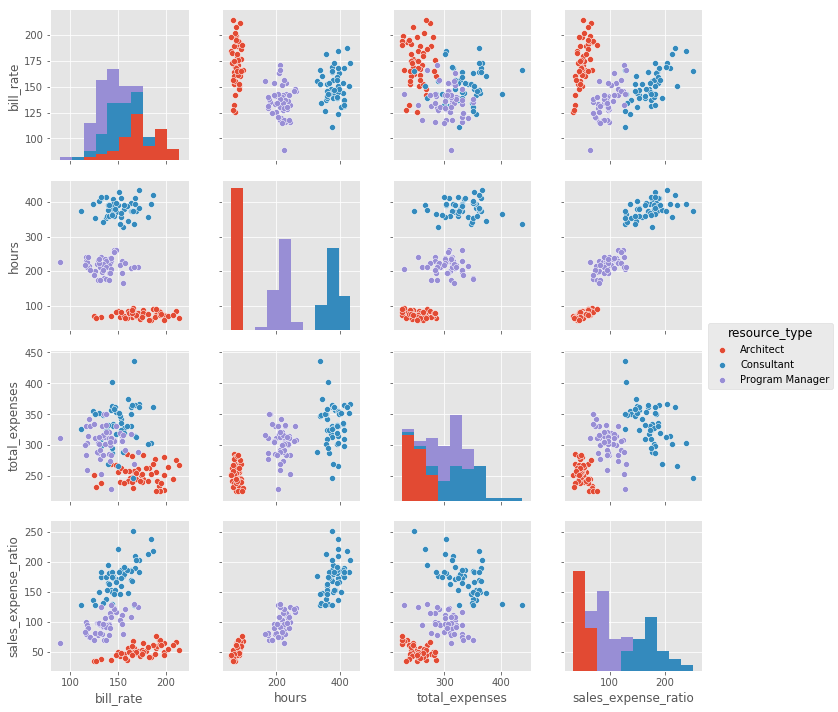

In [19]:
sns.pairplot(df, hue="resource_type")

**Seaborn**


Seaborn is also a plotting library is python. It makes assumptions about the data set you wish to plot. By adding additional graphics to the plots you wish to plot, Seaborn provides a plotting library with far better aesthetics than matplotlib. It is also more efficient. With a couple of lines of code, a far more visually appealing graphical reperesentation of the columns of the  data set can be provided. Seaborn is used in conjuction with pandas.

In the above plots, I used pairplot to graphically demonstrate the relationship between the variables of my simualation. Pairplot takes the dataframe from pandas and it produces a grid of 4 x 4 plots. The first column of columns plots total expenses against each of the other variables, the second column of colums plots bill rate against each of the other variables, the third column of columns plots hours against each of the other variables and the fourth column of columns plots operating ratio against each of the other variables. And likewise with the rows.

The idea of these 4 x 4 grid plots is to compare all the numeric values within the data set against each other. It ignores the classification variable resource type as this is not a numeric value. A legend has been provided by pairplot to show which data points relate to each of the resouce types.


**Bill rate histogram**

A histogram is a plot used for plotting one dimensional data. The bill rate histogram is plotting the bill rate values on the x axis and provides a graphical representation of their distribution, a normal distribution.  The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. [Ref: Histogram](https://searchsoftwarequality.techtarget.com/definition/histogram) The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) bill rate appear to peak around the mean of 170.9. The architect bill rate has a standard deviation of 19.05 or 11% of it's mean. The blue (consultant) bill rate appear to peak around the mean of 148.7. The consultant bill rate has a standard deviation of 16.12 or 11% of it's mean. The purple (purple) bill rate appear to peak around the mean of 138.5. The program manager bill rate has a standard deviation of 15.68 or 11% of it's mean. Although the mean of the resource types peak at different values, the shape of each of their plots is quite similar as their standard deviation is the same.

**Bill rate and hours scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the hours values on the y axis range from around 50 up to around 440. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding hours value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. There apear to have a bill rate ranging from 125 to 250 and there apprears to be deliveries fewer than 100 hours for architects. The purple (program manager) data points also appear to be in their own group. Program managers have a bill rate of around 100 to 175 and there appears to be deliveries of between 150 and 250 hours for program managers. The blue (consultant) data points also appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have deliveries of between 300 and 400 hours. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 


**Bill rate and total expenses scatter plot** 

The bill rate and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the total expenses values on the y axis range from around 211 up to around 416. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. Although the red (architect) data points appear to be in their own group, this group is not as definitive as other plots. There does appear to be some crossover with other resource types. They apear to have a bill rate ranging from 125 to 225 and they appear to have total expenses ranging from 210 to 280 . The purple (program manager) data points again appear to be in their own group but the grooup is not as definite. Program managers have a bill rate of around 100 to 175 and total expenses of 225 to 350. There apears to be quite a lot of variation in the blue (consultant) data points and it would be difficult to assign these data points into one group. They have a bill rate of around 110 to 180 and appear to have total expenses 250 to 425. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 

**Bill rate and sales expense ratio scatter plot** 

The bill rate and sales expense ratio plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the sales expense ratio values on the y axis range from around 37 up to around 255. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. They apear to have a bill rate ranging from 125 to 250 and they appear to have sales expense ratio ranging from 37 to 75. The purple (program manager) data points again appear to be in their own group. Program managers have a bill rate of around 100 to 175 and a sales expense ratio of 60 up to 150. The blue (consultant) data points appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have a sales expense ratio of 100 to 250. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting sales expense would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting sales expense ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting sales expense ratio are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 


**Hours and bill rate scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and bill rate values on the y axis range from 88 up to about 225. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding bill rate value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. There apear to have a bill rate ranging from 125 to 250 and there apprears to be deliveries fewer than 100 hours for architects. The purple (program manager) data points also appear to be in their own group. Program managers have a bill rate of around 100 to 175 and there appears to be deliveries of between 150 and 250 hours for program managers. The blue (consultant) data points also appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have deliveries of between 300 and 400 hours. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 

**Hours histogram**

A histogram is a plot used for plotting one dimensional data. The hours histogram is plotting the hours values on the x axis and provides a graphical representation of their distribution, a normal distribution.  The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. [Ref: Histogram](https://searchsoftwarequality.techtarget.com/definition/histogram) The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) hours appear to peak around the mean of 73.2. The architect hours have a standard deviation of 8.67 or 12% of it's mean. Because of the value of it's mean, the red data on the histogram has the highest peak. The purple (purple) hours appear to peak around the mean of 213. The purple (program) hours appear to peak around the mean of 138.50. The program manager bill rate has a standard deviation of 23.49 or 11% of it's mean. The blue (consultant) hours appear to peak around the mean of 277. The consultant bill rate has a standard deviation of 27.59 ot 10% of it's mean.  Although the mean of the resource types peak at different values, the shape of each of their plots is quite similar as their standard deviation to mean ratio is the same.

**Hours and total expenses scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and total expenses values on the y axis range from 210 up to about 400. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. They apear to have a hours deliveries ranging from 125 to 250 and total expenses appear to range from 210 to 300. The purple (program manager) data points appear to have deliveries of between 150 and 250 hours and have total expenses of 215 to 360. The blue (consultant) data points also appear to be in their own group. They have deliveries of between 300 and 400 hours and total expenses of 240 to 400. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total total expenses will be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants so there hours and resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting total expenses are the highest of the group.

**Hours and sales expense ratio scatter plot** 

The hours and sales expense ratio plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and the sales expense ratio values on the y axis range from around 211 up to around 416. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding sales expense value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. TTey apear to have a hours deliveries ranging from 125 to 250 and they appear to have sales expense ratio ranging from 37 to 75. The purple (program manager) data points are also in their own group. The purple (program manager) data points appear to have deliveries of between 150 and 250 hours and a sales expense ratio of 60 up to 150. The blue (consultant) data points are seem to be in their own group. They have deliveries of between 300 and 400 hours and appear to have a sales expense ratio of 100 to 250. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses and sales expense ratio would be quite low. Program managers take care of the day to day management of the project, they are not reuired to deliver as many hours as consulatnts so their hours and resulting total expenses and sales expenses ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses and sales expenses ratio are the highest of the three groups. 

**Total expenses and bill rate scatter plot** 

The bill rate and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The  total expenses values on the x axis range from around 211 up to around 416 and the bill rate values on the y axis range from 88 up to about 225. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. Although the red (architect) data points appear to be in their own group, this group is not as definitive as other plots. There does appear to be some crossover with other resource types. They appear to have total expenses ranging from 210 to 300 and apear to have a bill rate ranging from 125 to 225. The purple (program manager) data points again appear to be in their own group but the group is not as definite as other plots. Program managers have total expenses of 225 to 360 and a bill rate of around 105 to 185. There apears to be quite a lot of variation in the blue (consultant) data points and it would be difficult to assign these data points into one group. They appear to have total expenses 250 to 425 a bill rate of around 110 to 180 and appear to have total expenses 250 to 400. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 

**Total expenses and hours scatter plot** 

The hours and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The total expenses values on the x axis range from 210 up to about 400 and the hours values on the y axis range from around 50 up to around 440. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's total expenses values on the x axis and it's corresponding hours values on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. Total expenses appear to range from 210 to 300 and hours deliveries range from 50 to 100. The purple (program manager) data points are also in their own group. Total expenses of 215 to 360 and hours deliveries of between 180 and 250. The blue (consultant) data points also appear to be in their own group. Total expenses range 240 to 400 and hours deliveries of between 300 and 450. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total total expenses will be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants so there hours and resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting total expenses are the highest of the group.

**Total expenses histogram**

A histogram is a plot used for plotting one dimensional data. The hours histogram is plotting the hours values on the x axis and provides a graphical representation of their distribution, a normal distribution.  The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. [Ref: Histogram](https://searchsoftwarequality.techtarget.com/definition/histogram) The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) hours appear to peak around the mean of 250.3. The architect hours have a standard deviation of 17.62 or 7% of it's mean. This is the lowest standard deviation of the three resource types. Because of this, the red data on the histogram has the highest peak as we can expect the lowest swings for total expenses for architect hours. The purple (purple) hours appear to peak around the mean of 296.8. The program manager bill rate has a standard deviation of 25.80 or 9% of it's mean. This hours standard deviation is in the mid range of the three resource types so we can expect swings in total expenses in the mid range. The blue (consultant) hours appear to peak around the mean of 329.40. The consultant bill rate has a standard deviation of 31.79 ot 10% of it's mean. This is the largest standard deviation of the three resource types. Because of this, the blue data on the histogram has a flattest shape as we can expect larger swings in the hours delivered for consultant hours. I would recommend that management would review total expenses and implement some measures to try and standardise total expenses across the three groups. The standard deviation for total expenses is quite large across all of the resource types. This could lead to variation in our key performance ratio - sales to expense ratio.


**Total expenses and sales expense ratio scatter plot** 

The total expenses and sales expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The total expenses values on the x axis range from 210 up to about 400 and the sales expenses values on the y axis range from around 
25 up to around 400. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's total expenses values on the x axis and it's corresponding sales expense ratio values on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. Total expenses appear to range from 210 to 300 and the sales expenses ratio values range from 25 to 75. The purple (program manager) data points are also in their own group. Total expenses of 215 to 360 and the sales expense ratio values range from 60 to 150. The blue (consultant) data points also appear to be in their own group. Total expenses range 240 to 400 and sales expense ratio values range from 100 to 250. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. The resulting total expenses and sales expense ratio will be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants. The resulting total expenses and slaes expense ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting total expenses  and sales expense ratio are the highest of the group.

**Sales expense ratio and bill rate scatter plot** 

The sales expenses ratio and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The sales expense ratio values on the x axis range from around 25 up to around 250 and bill rate values range form 50 up to 225. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's sales expenses ratio values on the x axis and it's corresponding bill rate values on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. Sales expense ratio values appear to range from 25 to 75 and bill rate values range from 125 to 225. The purple (program manager) data points are also in their own group. Sales expense ratio ratio values range from 60 to 150 and bill rate values range from 110 to 185. The blue (consultant) data points also appear to be in their own group. Sales expense ratio values range from 100 to 250 and bill rate values range form 50 to 180. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and even though their bill rate is generally higher than the other two groups, the hours deliveries for this resouce type would be quite low. Therefore, the  resulting sales expense ratio will also be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants and their bill rate and total expenses would be in the mid range. The resulting sales expense ratio would be also in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and total expenses and resulting sales expense ratio are the highest of the group.

**Sales expense ratio and hours scatter plot** 

The sales expenses ratio and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The sales expense ratio values on the x axis range from around 25 up to around 250 and hours values range form 50 up to 450. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's sales expenses ratio values on the x axis and it's corresponding hours values on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. Sales expense ratio values appear to range from 37 to 75 and hours values range from 50 to 100. The purple (program manager) data points are also in their own group. Sales expense ratio values range from 60 to 150 and hours values range from 150 to 250. The blue (consultant) data points also appear to be in their own group. Sales expense ratio values range from 100 to 250 and hours values range from 300 to 450. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. The resulting sales expense ratio will also be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants. The resulting sales expense ratio would be also in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting sales expense ratio are the highest of the group.

**Sales expense ratio and total expenses scatter plot** 

The sales expenses ratio and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The sales expenses values on the x axis range from around 25 up to around 400 and total expenses values on the y axis range from 210 up to about 400. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's sales expenses ratio value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. Sales expenses ratio values range from 25 to 75 and total expenses appear to range from 210 to 300. The purple (program manager) data points are also in their own group. Sales expense ratio values range from 60 to 150 and total expenses ramge from 215 to 360. The blue (consultant) data points also appear to be in their own group. Sales expense ratio values range from 90 to 290. ands total expenses range 240 to 400. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. The resulting total expenses and sales expense ratio will be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants. The resulting total expenses and sales expense ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting total expenses and sales expense ratio are the highest of the group.


**Sales expense ratio histogram**

A histogram is a plot used for plotting one dimensional data. The sales expense ratio histogram is plotting the sales expense ratio values on the x axis and provides a graphical representation of their distribution, a normal distribution. The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. Ref: Histogram The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) sales expense ratio appears to peak around the mean of 49.19 and has the lowest peak on the histogram. The architect sales expense ratio has a standard deviation of 7.97 or 16% of it's mean.The blue (consultant) sales expense ratio appears to peak around the mean of 172.57. The consultant sales expenses ratio has a standard deviation of 32.28 or 19% of it's mean. The purple (purple) sales expense ratio appear to peak around the mean of 95.77. The program manager sales expense bratio has a standard deviation of 15.83 or 17% of it's mean. This is the lowest standard deviation of the three resource types. Because of this, the purple data on the histogram has the highest peak as we can expect lower swings in the bill rate charged for program manager hours. Although the mean of the resource types peak at different values, the shape of each of their plots is quite similar as their standard deviation to mean ratio is the same.

### 4. Detail your research and implement the simulation in a Jupyter Notebook - the data it self can simply be displayed in an ouput cell within the notebook

![scikit](https://raw.githubusercontent.com/fionanealon/KPI/master/img/scikit-learn-logo.jpeg)

## KNN 



Now that the data set has been simulated, we will now look at building a algorithm called k nearest neighbors that classifies the four variables of my data set. The algorithm will class the bill rate, hours, total expenses variables based on their numeric values. It will predict the class of their resource types - architect, consultant and program manager. It is key that some measurements are availble the class for those measurements are available. For example: there are fifty rows of measurements for each of the architect, consultant and program manager classes available on the consulting services data set. These measurements include bill rate, hours, total expenses and sales expenses ratio. Because these measurements of each class are available ot me, this is called a supervised learning problem. The goal of the algorithm is then to predict the class of resource type for measurements that have not been provided to it by the data set.

### Data

The k nearest algorithm will be generated using the dataframe I have just simulated for the consulting services engagement. See data set in below output cell.

In [20]:
df

,bill_rate,hours,total_expenses,sales_expense_ratio,resource_type
0,166.38,81.73,243.38,55.872452,Architect
1,189.69,77.39,256.89,57.145506,Architect
2,198.56,74.26,227.74,64.745173,Architect
3,164.17,66.45,247.79,44.025572,Architect
4,142.43,69.85,268.69,37.026817,Architect
5,162.29,85.46,247.01,56.148753,Architect
6,176.57,88.83,244.43,64.168527,Architect
7,174.65,73.78,251.26,51.284235,Architect
8,160.05,84.76,241.13,56.259437,Architect
9,171.39,79.09,261.58,51.820610,Architect


### Inputs and outputs

Firstly, I need to separate the dataframe into a set of inputs and a set of outputs so that k nearest neighbors algorithm can be trained with a set of inputs for which we know the outputs for. The inputs will be the four variables for which are numeric in the data set - bill rate, hours, total expenses and sales expense ratio. Then I create a new variable called inputs and set it to the dataframe. This will in turn select a sub-selction of the dataframe (four of the colums from the dataframe). Another variable called outputs will be created and this will be a sub-selction of the class column of the dataframe.

In [21]:
inputs = df[['bill_rate', 'hours', 'total_expenses', 'sales_expense_ratio']]
outputs = df['resource_type']

### Classifier

KNeighborsClassifier is a class in python and it represenst an instance of the k nearest neighboors setup. A data structure is created that represents the k nearest neighbors algorithm and k is set to five. So on the seaborn plots, k nearest neighbors will find the five nearest data points for each of the data points the plots. It will then take a majority vote from each of these data points and decide whether the class should be architect, consultant or program manager.

In [22]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

The classifier then needs to be trained on the data set. I will fit the classifier with the inputs for which I know the outputs so that it can build a model of each of the classes.

In [23]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predict

A prediction can now be made based on the trained k nearest neighbors classifier. To test the algorithm, I will select a row on the dataframe for which I already know the output - for example row 121 of the dataframe.

In [24]:
df.loc[121]

bill_rate                        137.6
hours                           219.04
total_expenses                  316.29
sales_expense_ratio             95.292
resource_type          Program Manager
Name: 121, dtype: object

I can use the values of row 121 to predict the class of these values using knn.predict. In the below epample, knn has correctly predicted the program manager class.

In [30]:
knn.predict([[137.6, 219.04, 316.29, 95.29]])

array(['Program Manager'], dtype=object)

### Evaluate

The knn.predict function takes sets of inputs and it predicts what the output should be for each of these inputs. If a suitable data set has been selected for the supervised learning algorithm. While the algorothim should be able to predict the output of of the inputs most of the time, unfortunately this does not happen all of the time. Using the below function, the number of correct predictions can be calculated. In the consulting services data set example, knn has predicted all classes correctly.

In [26]:
(knn.predict(inputs) == outputs).sum()

150

However, the classifer is supposed to make predictions about inputs it hasn't seen before not for ones it has seen before. Rather than fitting the knn with all of the inputs and outputs of the dataframe, we take a random selection of 100 rows of the dataframe and train the knn on those 100 and test the knn on the remaining 50. We can do this with the mod.train_test_split function. I pass in inputs and outputs and choose a test size of a third of the samples. The function returns four arrays - training inputs, testing inputs, training outputs and testing outputs.

In [27]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

A new classifier then needs to be created for the new variables. The classifier then needs to be trained on the new inputs and ouputs.

In [28]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Using knn.predict, I will predict the test inputs. The mod.train_test_split function has assisted knn is calculating all 50 of teh tets inputs correctly.

In [29]:
(knn.predict(inputs_test) == outputs_test).sum()

50

### End